<a href="https://colab.research.google.com/github/harishkumar77/ML_20BRS1231/blob/main/20BRS1231_ML_DA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

California housing dataset

In [ ]:
data = pd.read_csv('/content/housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
3661,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
3662,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
3663,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
3664,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


Processing the data

In [ ]:
data['ocean_proximity'].replace({'NEAR BAY':0,'INLAND':1,'<1H OCEAN':2,'NEAR OCEAN':3,'ISLAND':4},inplace = True)

In [ ]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0


In [ ]:
data.insert(0, 'ID', range(1, 1 + len(data)))

In [ ]:
data

,ID,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,1,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0
1,2,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0
2,3,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0
3,4,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0
4,5,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0
...,...,...,...,...,...,...,...,...,...,...,...
3661,3662,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,1
3662,3663,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,1
3663,3664,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,1
3664,3665,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,1


In [ ]:
#X = data.drop('ocean_proximity',axis=1) # Independet variable
#y = data['ocean_proximity'] # dependent variable

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#X_train, X_test,_Ytrain, Y_test = train_test_split(X,y ,random_state=104, test_size=0.25, shuffle=True)

The number of missing values in each column.

In [ ]:
data.isna().sum()

ID                     0
longitude              0
latitude               0
housing_median_age     0
total_rooms            0
total_bedrooms        42
population             0
households             0
median_income          0
median_house_value     0
ocean_proximity        0
dtype: int64

So , as we can see there are no missing values in any attribute except total_bedrooms attribute which 207 missing values

In [ ]:
from sklearn.impute import SimpleImputer
mean_value = data['total_bedrooms'].mean()
print('the mean value is  ',mean_value)
data['total_bedrooms'].fillna(value=mean_value, inplace=True)
print('The updated data which has no missing values :-')
data

the mean value is   499.53476821192055
The updated data which has no missing values :-


,ID,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,1,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0
1,2,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0
2,3,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0
3,4,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0
4,5,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0
...,...,...,...,...,...,...,...,...,...,...,...
3661,3662,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,1
3662,3663,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,1
3663,3664,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,1
3664,3665,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,1


Checking if there are any null values after filling the values, and there are missing values

In [ ]:
data.isna().sum()

ID                    0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Normalizing the data

In [ ]:
from sklearn.preprocessing import Normalizer

norm = Normalizer()
data.iloc[:,1:-1] = norm.fit_transform(data.iloc[:,1:-1])
data

,ID,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,1,-0.000270,0.000084,0.000091,0.001944,0.000285,0.000711,0.000278,0.000018,0.999998,0
1,2,-0.000341,0.000106,0.000059,0.019797,0.003084,0.006696,0.003174,0.000023,0.999772,0
2,3,-0.000347,0.000107,0.000148,0.004166,0.000540,0.001409,0.000503,0.000021,0.999990,0
3,4,-0.000358,0.000111,0.000152,0.003733,0.000689,0.001635,0.000642,0.000017,0.999991,0
4,5,-0.000357,0.000111,0.000152,0.004754,0.000818,0.001651,0.000757,0.000011,0.999987,0
...,...,...,...,...,...,...,...,...,...,...,...
3661,3662,-0.001550,0.000505,0.000320,0.021312,0.004787,0.010816,0.004224,0.000020,0.999693,1
3662,3663,-0.001572,0.000512,0.000233,0.009040,0.001945,0.004617,0.001479,0.000033,0.999944,1
3663,3664,-0.001313,0.000427,0.000184,0.024411,0.005253,0.010906,0.004689,0.000018,0.999617,1
3664,3665,-0.001432,0.000465,0.000212,0.021953,0.004827,0.008746,0.004119,0.000022,0.999699,1


Ensemble learning

Random forest 

In [ ]:
X = data.drop('ocean_proximity',axis=1)
y = data['ocean_proximity']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

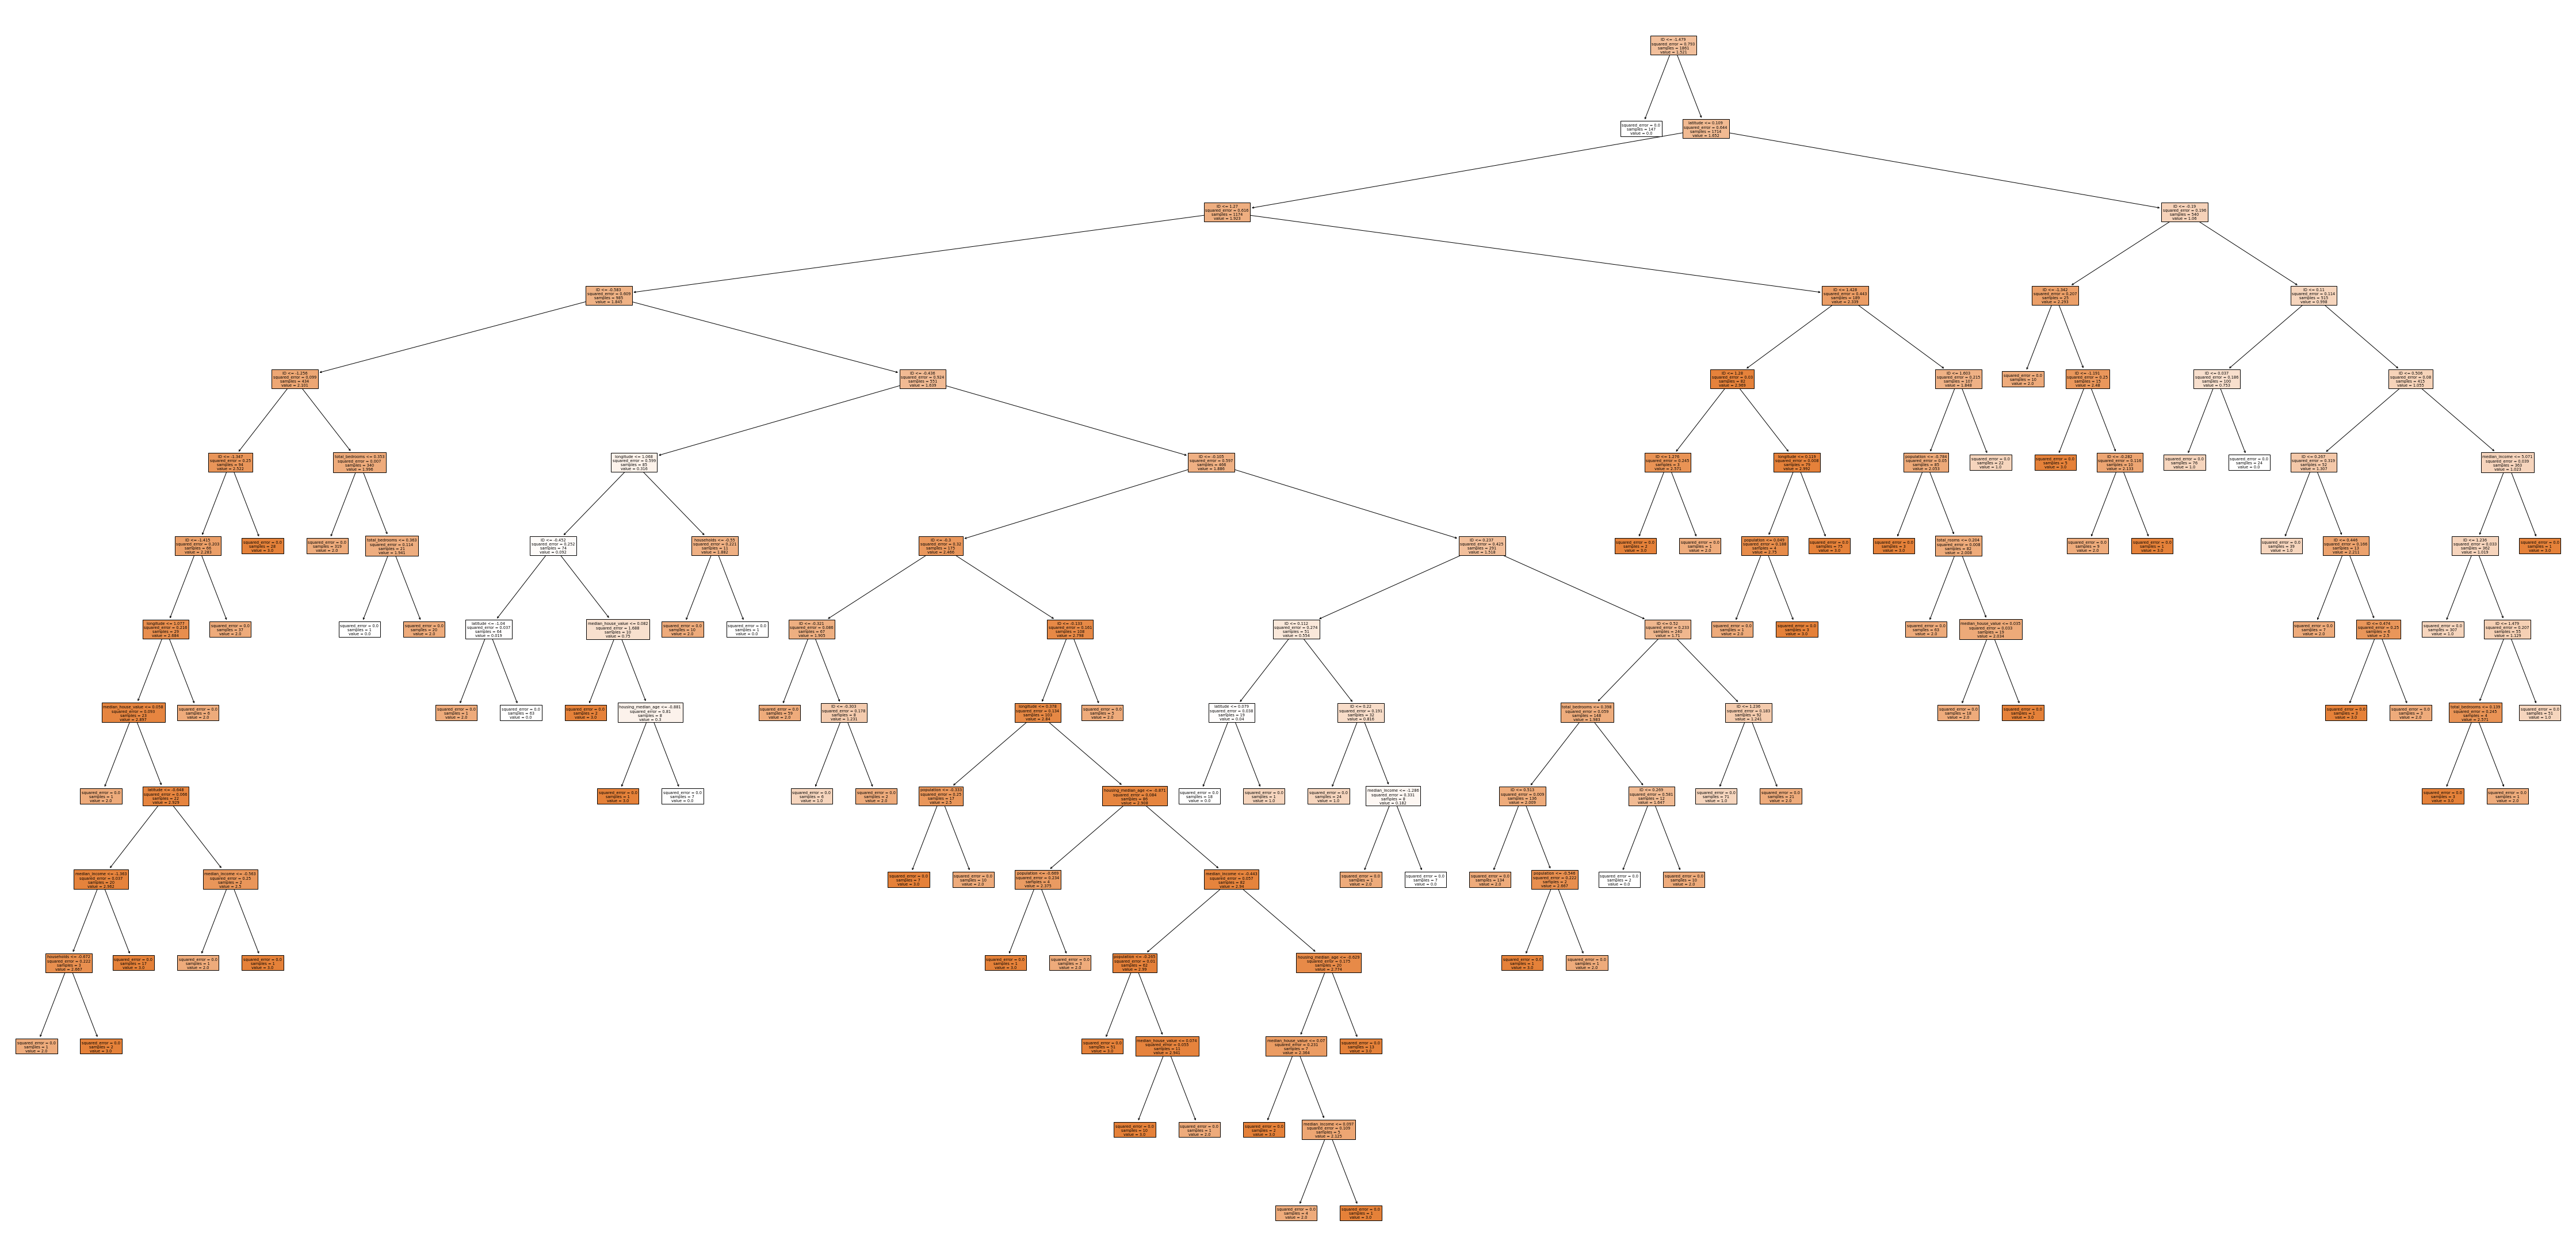

In [ ]:
plt.figure(figsize=(80,40))
plot_tree(regressor.estimators_[5], feature_names = X.columns,class_names=['Authentic', "No Authentic"],filled=True);

Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6226158038147139


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)
model = abc.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9768392370572208


Gradient Boosting 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train, y_train)
print('model score = ',model.score(X_test,y_test))

model score =  0.9768392370572208


XGBoost

In [ ]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(X_train, y_train)
print('model score = ',model.score(X_test,y_test))

[17:05:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model score =  0.9400748496441865


Light GBM

In [ ]:
import lightgbm as lgb
train_data=lgb.Dataset(X_train,label=y_train)
params = {'learning_rate':0.001}
model= lgb.train(params, train_data, 100)
from sklearn.metrics import mean_squared_error
rmse=mean_squared_error(y_pred,y_test)**0.5
print('rmse = ',rmse)

rmse =  0.6561384847512468
